# Objectives

- Twitter's impact on businesses, brands, reputation, sentiment analysis (+/-/neutral), predictions and more
- Use of Tweepy -> Popular Python twitter API client for data mining from twitter
- Tweeter search API to download past tweets
- Use Twitter streaming API to sample the stream of live tweets
  * Objectives:
  - tweet object -> information contained; text, location
  - Use of NLP - clean and preprocess tweets
  - Sentiment analysis
  - Spot trends using Twitter's Trend API
  - Map Tweets using folium and openstreet maps
  - How to score tweets

# Twitter
- tweet - short messages -- 140 characters -- 280 characters
- choose to follow anyone else `"drinking from a fire hose"`
- Twitter remains a major source for researchers and business people
- Free access to a small portion of recent tweets
- Twitter offers paid access to larger protion of tweets

##  Twitter APIs
- Webservices -> methods called in the cloud
- Each method has a web service endpoint
- The endpoint is represented by a URL that is used to invoke that method
- Because internet connections can be lost/changed/unavailable, apps therefore can be brittle
- Twitter APIs:
  - Authentication API
  - Accounts and Users API - access information about an account
  - Trends API: Trending topics by location

### Rate Limits
- Twitter expects you to use their services in a responsible manner
- Understand rate limits before using any methods
- You can be blocked from the use of a certain given API once the rate limit is reached
- You can configure tweepy so that it waits once the rate limit is reached
- Some methods list user rate limits(allow users to access their accounts) and app rate limits (allow users to log in)

## Tweets
- Twitter API methods return JSON - javascript object notation
- Fill
- It represents objects as collections of name: value
- It is both Human and machine readable
```json
{
  'propertyName': value,
  'propertyName2': value2
}
```
- We also have JSON array format which resembles a python list i.e. [value, value1, value2]
- JSON is handled behind the scenes by Tweepy

### Key properties of a Tweet object
- tweet (status update) - metadata - when created, who created it, list of hashtags, urls, @mentions, images, videos, locations and more
  - created at -> creation date and time in UTC
  - entities -> twitter extracts metadata
  - extended_tweet -> tweets that have over 140 characters full_text
  - favorite count -> the number of times users favorite/like the tweet
  - coordinates -> latitude & longitude
  - place
  - id
  - id_str -> string representation of the tweet's integer id
  - lang -> language
  - retweet_count
  - text -> 280 characters
  - user -> the user that posted the tweet

In [66]:
!pip install folium

# Creating an app

- Each app that you create has separate credentials
- If you send tweets via the API the app name will be the user sending the tweets.
- The app name is also what is shown to the user if you create an application that requires login


- The Tweepy API object is the gateway to using the Twitter APIs
- Before using it you must first authenticate with Twitter

In [67]:
import tweepy

In [68]:
import keys

- We create and configure an authentication OAuthHandler to authenticate with Twitter

In [69]:
auth = tweepy.OAuthHandler(keys.consumer_key, keys.consumer_secret)

In [70]:
auth.set_access_token(keys.access_token, keys.access_token_secret)

- The auth object is an object of type OAuthHandler
- We need to avoid violating the rate limit restrictions.
- To do this we use:
  - `wait_on_rate_limit = True`
  - `wait_on_rate_limit_notify = True` -> tells tweepy to display a command line message if you hit a rate limit

In [71]:
api = tweepy.API(auth_handler=auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

### Getting information about a Twitter account

- API has a method called `get_user` which returns a tweepy.models.user object. It contains information about a specific user's account

In [72]:
nasa = api.get_user('nasa')

In [73]:
nasa.id

11348282

In [74]:
nasa.name

'NASA'

In [75]:
nasa.screen_name

'NASA'

In [76]:
nasa.description

'🚀 Exploring the universe and our home planet.'

In [77]:
trump = api.get_user('donaldtrump')

In [78]:
trump.name

'Donald J. Trump'

In [79]:
trump.id

736267842681602048

In [80]:
trump.screen_name

'DonaldTrump'

In [81]:
trump.description

'Visit the official Donald J. Trump Twitter handle @realDonaldTrump.\n\nhttps://t.co/HyNW4tByaR'

In [82]:
real_trump = api.get_user('realdonaldtrump')

In [83]:
real_trump.id

25073877

In [84]:
real_trump.name

'Donald J. Trump'

In [85]:
real_trump.screen_name

'realDonaldTrump'

In [86]:
real_trump.description

'45th President of the United States of America🇺🇸'

In [87]:
obama = api.get_user('BarackObama')

In [88]:
obama.id

813286

In [89]:
obama.name

'Barack Obama'

In [90]:
obama.screen_name

'BarackObama'

In [91]:
obama.description

'Dad, husband, President, citizen.'

In [92]:
jack = api.get_user('jack')

In [93]:
jack.id

12

In [94]:
jack.name

'jack'

In [95]:
jack.screen_name

'jack'

In [96]:
jack.description

'#bitcoin'

### Getting the most recent status update

- The User object status property returns the tweepy.models.Status object which shows the status of the user

In [97]:
nasa.status.text

'🚀 The @SpaceX resupply mission launching Sat., Dec. 5 will make history for many firsts, including the first time 2… https://t.co/V7aoqiUzqs'

In [98]:
obama.status.text

'Thanks for sharing Marjon. I hope you get something out of A Promised Land – keep up the good work! https://t.co/61xocjGFB5'

In [99]:
real_trump.status.text

'RT @realDonaldTrump: https://t.co/AMIT0WetT1'

In [100]:
real_trump.followers_count

88747750

In [101]:
obama.friends_count

598240

In [102]:
real_trump.friends_count

51

In [103]:
trump.friends_count

7

In [104]:
me = api.me()

In [105]:
me.name

'gitudaniel'

In [106]:
me.followers_count

2

In [107]:
me.description

'Learner of things'

### Introduction to Tweepy cursors: Getting an account's Followers and Friends

- The Twitter API methods often return a collection of objects
- Tweets in another accounts timeline
- They can also return a list of Tweets that match a specified criteria
- Timeline -> Tweets sent by a user and that user's friends
- Each method's docs will specify the max number of items returned (pagination of results)
- JSON responses say whether there are more pages to get
- The cursor handles pagination so that it can invoke the method that checks whether we have another page of results
- It continues checking whether we have more pages subject to the rate limits. If there is a limit the cursor will wait

- The followers API object calls the followers list method and returns groups of 20 by default.
- It can request 200 at a time

In [108]:
followers = []

In [109]:
cursor = tweepy.Cursor(api.followers, screen_name='nasa', count=20)

- We can iterate over the cursor's results
- The items method calls api.followers and returns the followers

In [110]:
# for account in cursor.items():
#   followers.append(account.screen_name)

In [111]:
print('Followers: ', ' '.join(sorted(followers, key=lambda s: s.lower())))

Followers:  


In [112]:
nasa_tweets = api.user_timeline(screen_name='nasa', count=5)

In [113]:
for tweet in nasa_tweets:
  print(f'{tweet.user.screen_name}: {tweet.text}\n')

NASA: 🚀 The @SpaceX resupply mission launching Sat., Dec. 5 will make history for many firsts, including the first time 2… https://t.co/V7aoqiUzqs

NASA: Project Scientist Bob Pappalardo of @NASAJPL discusses our upcoming @EuropaClipper mission as well as the possibili… https://t.co/f4f1T57vjh

NASA: What investigations &amp; science activities will be part of #Artemis III, which will land @NASA_Astronauts on the luna… https://t.co/vjcwA4vl8u

NASA: ☁️ Weather is 50% GO for launch tomorrow. 

Melody Lovin, launch weather officer for the @45thSpaceWing describes i… https://t.co/y9qDzGf2L9

NASA: 🛰️ Stays on @Space_Station for 75 days 
🧪Double the amount of powered cargo (good for life sciences) 
✔️Certified f… https://t.co/pRwrMf61fO



In [114]:
# Get the recent tweets from your timeline
api.home_timeline()

[]

In [115]:
trump_tweets = api.user_timeline(screen_name='realdonaldtrump', count=5)

In [116]:
tt = api.user_timeline(screen_name='realdonaldtrump', count=5)

In [117]:
for tweet in tt:
  print(f'{tweet.user.screen_name}: {tweet.text}\n')

realDonaldTrump: RT @realDonaldTrump: https://t.co/AMIT0WetT1



In [118]:
tweets = []
for tweet in tt:
  tweets.append(tweet.text)
  print(f'{tweet.user.screen_name}: {tweet.text}\n')

realDonaldTrump: RT @realDonaldTrump: https://t.co/AMIT0WetT1



In [119]:
tweets

['RT @realDonaldTrump: https://t.co/AMIT0WetT1']

In [120]:
from textblob import TextBlob

In [121]:
for tweet in tweets:
  blob = TextBlob(tweet)
  sentiment = blob.sentiment
  print(f'{sentiment}: {tweet}')

Sentiment(polarity=0.0, subjectivity=0.0): RT @realDonaldTrump: https://t.co/AMIT0WetT1


# Getting a user's recent Tweets

- We can get a timeline - account's tweets and tweets from that account's friends
- Calls Twitter status/user_timeline method.
- What is returned is about 20 Tweets as a user's status but it is possible to get even 200 at a time
- You can call up to 1500 times for every 15 minutes

In [122]:
nasa_tweets = api.user_timeline(screen_name='nasa', count=3)

In [123]:
for tweet in nasa_tweets:
  print(f"{tweet.user.screen_name}: {tweet.text}\n")

NASA: 🚀 The @SpaceX resupply mission launching Sat., Dec. 5 will make history for many firsts, including the first time 2… https://t.co/V7aoqiUzqs

NASA: Project Scientist Bob Pappalardo of @NASAJPL discusses our upcoming @EuropaClipper mission as well as the possibili… https://t.co/f4f1T57vjh

NASA: What investigations &amp; science activities will be part of #Artemis III, which will land @NASA_Astronauts on the luna… https://t.co/vjcwA4vl8u



In [124]:
obama_tweets = api.user_timeline(screen_name='barackobama', count=10)

In [125]:
for tweet in obama_tweets:
  print(f"{tweet.user.screen_name}: {tweet.text}\n")

BarackObama: Thanks for sharing Marjon. I hope you get something out of A Promised Land – keep up the good work! https://t.co/61xocjGFB5

BarackObama: Glad to see A Promised Land in such good company. https://t.co/u9TJ83ZPyn

BarackObama: If you're in Georgia, make sure you and everybody you know is registered to vote by Monday, December 7. And if you… https://t.co/GfHANu080x

BarackObama: Join me for a conversation with the next U.S. Senators from Georgia, @ReverendWarnock and @Ossoff, along with… https://t.co/m9L0dcK9T7

BarackObama: We started the @ObamaFoundation to help a new generation build a better tomorrow. And many of them already are, ste… https://t.co/8m4RnDEZjR

BarackObama: Let’s all do our part this Thanksgiving to keep people safe and healthy. Celebrate virtually, if you can. Wear a ma… https://t.co/S1r3G3ooRa

BarackObama: The balance of power in the Senate is at stake in Georgia’s runoff election. We’ve got two great candidates—… https://t.co/1CuQn9BES2

BarackObama: 

# Searching for recent Tweets

- We can do this via an API search method
- It gives you values that return a query_string for the previous 7 days Tweets
- No guarantees that you'll be able to get all the matching Tweets
- We use Twitter's search/tweet method
- The default returned is 15 Tweets

In [126]:
# uploaded file
# from tweetutilities import print_twitter_data

In [127]:
tweets = api.search(q='Rover Mars', cont=10)

In [128]:
def print_tweets(tweets):
  """For each Tweepy status object in tweets, display the user's screen_name and the Tweet text.
  If the language used is not English, then we translate the text with TextBlob."""
  for tweet in tweets:
    print(f'{tweet.user.screen_name}: ', end=' ')
    if 'en' in tweet.lang:
      print(f'{tweet.text}\n')
    elif 'und' not in tweet.lang: # und -> cannot understand the language
      print(f'\n ORIGINAL: {tweet.text}')
      try:
        print(f'TRANSLATED: {TextBlob(tweet.text).translate()}\n')
      except:
        print('Unable to translate tweet')

In [129]:
print_tweets(tweets)

groupiecat:  
 ORIGINAL: RT @anajuliabanlei: El pequeño rover Sojourner descendió de la Mars Pathfinder, renombrada Carl Sagan Memorial Station, en honor del astrón…
TRANSLATED: RT @anajuliabanlei: The small Sojourner rover descended from the Mars Pathfinder, renamed Carl Sagan Memorial Station, in honor of the astronomer ...

PaulHammond51:  RT @farahalibay: I led a cool little test in the Mars Yard yesterday! We practiced the deployment of the Ingenuity helicopter from the @NAS…

MagikalBlackGrl:  @AK_IceStorm @nowthisnews Bill Nye-Cornell graduate:
 -Invented hydraulic res suppressor tubes for 747's 
-Develope… https://t.co/B8pK5Wq724

dawn_com:  Change 5, the third Chinese spacecraft to land on the moon and the first to take off from it again, is the latest i… https://t.co/iASpG9z6Vq

sazi_ana:  RT @Sgt_Patterson: Interesting #Nuclear facts.
What do you do when the sun’s energy is too weak to rely on solar panels? 

Did you know the…

HadesInShades:  The Mehran Mars Rover version h

In [130]:
tweets = api.search(q="Rover or Mars", count=10)

In [131]:
print_tweets(tweets)

larakrepps:  @Sneffleupagus I love teaching 1st grade for many reasons, but being able to smack myths down is one of my faves -… https://t.co/M7aazf9fUz

VivifySTEM:  This cute book teaches basic knowledge about planets through the story of a personified Mars who just wants a pet t… https://t.co/19cFPaOo4U

SpaceAdvisor:  The Rover that will explore the #Mars moon Phobos starts landing tests with a date scheduled for touch down in late… https://t.co/age1QHnvoS

leightonwhiteni:  @ChrisGiangiulio @zapterra2020 @stillgray im waiting for Elon to send someone on a Tesla rover on the moon or mars

UKaerospace:  @lougrims @NatAdAstra @_Ben_in_space No, clearly I was referring to the BlueMarble Web side which is specifically w… https://t.co/YwZh50cFD3

stockfjm:  RT @AsgardiaSpace: An engineering prototype of @NASA’s Volatiles Investigating Polar Exploration Rover, or #VIPER, demonstrates newly integ…

AsgardiaSpace:  An engineering prototype of @NASA’s Volatiles Investigating Polar Explorati

In [132]:
tweets = api.search(q='nasa :(')

In [133]:
print_tweets(tweets)

ford_nikka:  
 ORIGINAL: @rjdevenecia Nasa jabi akin, want ko silang isurprise ng family meal :((
TRANSLATED: @rjdevenecia Nasa jabi akin, I want to surprise them with a family meal: ((

kleyrxi:  
 ORIGINAL: never ko pa na expi kahit nung nasa sols pa ako :((( https://t.co/j7FEYc7bGu
TRANSLATED: I never had an expi even when I was still in the sols: (((https://t.co/j7FEYc7bGu

exo_elucky:  
 ORIGINAL: RT @allfor100hyun: hello ulet :'&gt; i'd really appreciate it if you'll help me / help me find someone na makakatulong sa project ko :(( di ko…
Unable to translate tweet
bryan_abarquez:  
 ORIGINAL: Kinakabahan ako kapag binigay na yon.... 

baka mamayaa... ako nanaman ang nasa baba :((
TRANSLATED: I get nervous when that is given ....

baka mamayaa ... ako nanaman ang nasa baba: ((

imlyndignos:  
 ORIGINAL: after ilang months ko magparebond, napapansin ko na parang nipis na nung hair ko sa part na nasa photo. Napansin di… https://t.co/BqebWvg1Xw
TRANSLATED: after a few months I bond, I

In [134]:
tweets = api.search(q="rover -mars", count=10)  # rover without mars being mentioned

In [135]:
print_tweets(tweets)

OlawaleAbeeb09:  RT @ltd_naija: FOR SALE!!!⠀
⠀
Make: Range Rover⠀
⠀
Model: Evogue [Dynamic]⠀
⠀
Year of manufacture: 2018

Condition: Foreign used

Transmiss…

DealDonkeyUS:  80 bucks -------- RT if good deal | like if like! #eBay #deal #Nintendo #Nintendo3DS #3DS #Nintendo3DSPearlPink… https://t.co/0BnlQVtpfH

DealDonkeyUS:  14 bucks -------- RT if good deal | like if like! #eBay #deal #Playstation3 #PS3 #Fallout3 
🔗… https://t.co/jepXW6myYv

DealDonkeyUS:  18 bucks -------- RT if good deal | like if like! #eBay #deal #Playstation4 #PS4 #NierAutomata 
🔗… https://t.co/7jLxHvrbEg

DealDonkeyUS:  6 bucks -------- RT if good deal | like if like! #eBay #deal #Xbox #UnrealChampionship 
🔗 https://t.co/SASgglX5R8 https://t.co/xmd8GnHIrf

DealDonkeyUS:  89 bucks -------- RT if good deal | like if like! #eBay #deal #Playstation3 #PS3 #NCAAFootball14 
🔗… https://t.co/beAWD8tl6r

DealDonkeyUS:  5 bucks -------- RT if good deal | like if like! #eBay #deal #Playstation #PS1 #PSX #PSone #DukeNukemTim

# Searching with Twitter search parameters

- Using a date

In [136]:
tweets = api.search(q='from:nasa since:2019-12-12', count=10)

In [137]:
print_tweets(tweets)

NASA:  🚀 The @SpaceX resupply mission launching Sat., Dec. 5 will make history for many firsts, including the first time 2… https://t.co/V7aoqiUzqs

NASA:  Project Scientist Bob Pappalardo of @NASAJPL discusses our upcoming @EuropaClipper mission as well as the possibili… https://t.co/f4f1T57vjh

NASA:  What investigations &amp; science activities will be part of #Artemis III, which will land @NASA_Astronauts on the luna… https://t.co/vjcwA4vl8u

NASA:  ☁️ Weather is 50% GO for launch tomorrow. 

Melody Lovin, launch weather officer for the @45thSpaceWing describes i… https://t.co/y9qDzGf2L9

NASA:  🛰️ Stays on @Space_Station for 75 days 
🧪Double the amount of powered cargo (good for life sciences) 
✔️Certified f… https://t.co/pRwrMf61fO

NASA:  ❓ Fun fact: If the weather holds on Saturday, this will be the third year in a row that @SpaceX launches a commerci… https://t.co/BQ42U57hbT

NASA:  🤔 Wondering what’s flying on board the upgraded Cargo Dragon? 

Take a behind-the-scenes look a

# Searching for a Hashtag

- A hashtag on Twitter indicates something important, like a trending topic

In [138]:
tweets = api.search(q='#stateofthenation', count=10)

In [139]:
print_tweets(tweets)

Copperflowers:  KeithKaith:  RT @Iromg: Join us tomorrow for #StateOfTheNation from 10am @talkRADIO https://t.co/qqoYGnGjXs

Karen1732:  RT @Iromg: Join us tomorrow for #StateOfTheNation from 10am @talkRADIO

chrision1955:  RT @Iromg: Join us tomorrow for #StateOfTheNation from 10am @talkRADIO

ElectricArcMan:  RT @Iromg: Join us tomorrow for #StateOfTheNation from 10am @talkRADIO https://t.co/qqoYGnGjXs

buckland_jan:  RT @Iromg: Join us tomorrow for #StateOfTheNation from 10am @talkRADIO

Iromg:  Join us tomorrow for #StateOfTheNation from 10am @talkRADIO https://t.co/qqoYGnGjXs

NICDAMSA:  Festive season travel under COVID-19 regulations. Remember we are still on level 1 of lockdown. 
#COVID19… https://t.co/NFnly2KsjO

TweetPatrols:  
 ORIGINAL: Ok sige tatanggapin ko na obob tayo 😫 imagine mas obob pa yung next gen. I am not surprised. Test the high school s… https://t.co/83kcQ5ocuZ
TRANSLATED: Ok, I will accept that we are obob 😫 imagine the next gen is even obob. I am not surpris

In [140]:
tweets = api.search(q='#Messi', count=10)

In [141]:
print_tweets(tweets)

casa_casa3:  xxnicolas1562:  
 ORIGINAL: J'ai choisi #Messi pour #TheBest ! Et vous ? https://t.co/LB6XIfdCRO
TRANSLATED: I chose #Messi for #TheBest! And you ? https://t.co/LB6XIfdCRO

ELRick10:  
 ORIGINAL: RT @KaryCorrea: Todo parece normal con #Messi, pero desde París, #Neymar le manda guiños para juntarse de nuevo en #PSG

También desde #Man…
TRANSLATED: RT @KaryCorrea: Everything seems normal with #Messi, but from Paris, #Neymar sends him winks to get together again in #PSG

Also from # Man ...

lucashernan27:  
 ORIGINAL: 🔴🔵Hoy no es un sábado cualquiera hoy juega #Barcelona y Leo #Messi 🔴🔵
TRANSLATED: 🔴🔵Today is not just any Saturday, today #Barcelona and Leo #Messi play 🔴🔵

PSG24hours:  
 ORIGINAL: RT @KaryCorrea: Todo parece normal con #Messi, pero desde París, #Neymar le manda guiños para juntarse de nuevo en #PSG

También desde #Man…
TRANSLATED: RT @KaryCorrea: Everything seems normal with #Messi, but from Paris, #Neymar sends him winks to get together again in #PSG

Also f

# Spotting Trends: Twitter Trends API

- `Going Viral` -> Having thousands or millions of users posting about something at once
- Twitter maintains a list of trending topics worldwide
- We can use the Twitter Trends API that returns the list of trending topics locations and the top 50 trending topics for each location

In [142]:
trends_available = api.trends_available()

In [143]:
len(trends_available)

467

In [144]:
trends_available[0]

{'country': '',
 'countryCode': None,
 'name': 'Worldwide',
 'parentid': 0,
 'placeType': {'code': 19, 'name': 'Supername'},
 'url': 'http://where.yahooapis.com/v1/place/1',
 'woeid': 1}

In [145]:
trends_available[1]

{'country': 'Canada',
 'countryCode': 'CA',
 'name': 'Winnipeg',
 'parentid': 23424775,
 'placeType': {'code': 7, 'name': 'Town'},
 'url': 'http://where.yahooapis.com/v1/place/2972',
 'woeid': 2972}

In [146]:
trends_available[23]

{'country': 'United Kingdom',
 'countryCode': 'GB',
 'name': 'Manchester',
 'parentid': 23424975,
 'placeType': {'code': 7, 'name': 'Town'},
 'url': 'http://where.yahooapis.com/v1/place/28218',
 'woeid': 28218}

In [147]:
world_trends = api.trends_place(id=1528488)

In [148]:
trend_list = world_trends[0]['trends']

In [149]:
len(trend_list)

50

In [150]:
trend_list[0]

{'name': '#fridayvigilexpo',
 'promoted_content': None,
 'query': '%23fridayvigilexpo',
 'tweet_volume': 46113,
 'url': 'http://twitter.com/search?q=%23fridayvigilexpo'}

In [151]:
trend_list[1]

{'name': '#MasculinitySaturday',
 'promoted_content': None,
 'query': '%23MasculinitySaturday',
 'tweet_volume': None,
 'url': 'http://twitter.com/search?q=%23MasculinitySaturday'}

In [152]:
trend_list[2]

{'name': '#euamrefkochcleanup',
 'promoted_content': None,
 'query': '%23euamrefkochcleanup',
 'tweet_volume': None,
 'url': 'http://twitter.com/search?q=%23euamrefkochcleanup'}

## Question

- Search for Data Science

In [153]:
tweets = api.search(q='datascience', count=10)

In [154]:
print_tweets(tweets)

ntdmagic:  We may give views on markets that can be ahead of timings , but we have a #datascience and #Humanintelligence proje… https://t.co/4OSTF5jdEw

rstats_tweets:  RT @OscarBaruffa: This looks like quite a comprehensive #DataScience course and it's done in #RStats https://t.co/kdDhJdJ4xh

thomashilbig2:  RT @KirkDBorne: #SmartTransportation Projects are Foundational for Sustainable #SmartCities: https://t.co/nqTr3QtvuF
——
#IoT #IIoT #IoTPL #…

30xcodes:  RT @SourabhSKatoch: TensorDash- A Must-Have Tool for Every Data Scientist.

https://t.co/gxuw0400WZ

#MachineLearning #AI #100DaysOfCode #D…

Dg_Ingala:  @PrasoonPratham I still battle to grasp the concept of "Prediction" in Machine Learning. You have data. You split i… https://t.co/US0Rb3GhOJ

xaelbot:  RT @SourabhSKatoch: TensorDash- A Must-Have Tool for Every Data Scientist.

https://t.co/gxuw0400WZ

#MachineLearning #AI #100DaysOfCode #D…

cont_learn:  RT @SourabhSKatoch: TensorDash- A Must-Have Tool for Every Data Scientist.


# Getting today's worldwide trending topics

- Trends with more than 10000 tweets, the tweet_volume is the number of tweets
- we can filter the list so that it only contains more than 10000 tweets and sort by tweet_volume

In [155]:
trends_list = [t for t in trend_list if t['tweet_volume']]

In [156]:
from operator import itemgetter

In [157]:
trends_list.sort(key=itemgetter('tweet_volume'), reverse=True)

In [158]:
for trend in trends_list[:20]:
  print(trend['name'])

Trump
Biden
Christmas
America
Master
Queen
WhatsApp
iPhone
Tough
Speaking
Study
Mariah
Africa
Bantu
Israel
Classes
Western
Larry
Thanksgiving
Chelsea


In [159]:
nyc_trends = api.trends_place(id=2459115)

In [160]:
nyc_list = nyc_trends[0]['trends']

In [161]:
nyc_list = [t for t in nyc_list if t['tweet_volume']]

In [162]:
nyc_list.sort(key=itemgetter('tweet_volume'), reverse=True)

In [163]:
for trend in nyc_list[:10]:
  print(trend['name'])

Euphoria
Merry Christmas
Mando
Selena
Pentagon
Jim Jordan
#TheMandalorian
fred hampton
Ashanti
Wisconsin


# Creating the wordcloud from trending topics

- We want to visualize the trending topics with more than 10000 tweets each

In [164]:
topics = {}  # stores names and volume of tweets

In [165]:
for trend in nyc_list:
  topics[trend['name']] = trend['tweet_volume']

In [166]:
topics

{'#FreeXBox': 26871,
 '#GrinchesOfGeoriga': 13997,
 '#SmackDown': 32390,
 '#TheMandalorian': 82399,
 'Ashanti': 74337,
 'Big Mouth': 33176,
 'Bill Nye': 22368,
 'Boba Fett': 22682,
 'DACA': 67099,
 'Euphoria': 177925,
 'Garlic': 35901,
 'Jim Jordan': 86785,
 'Keyshia': 64616,
 'Kyrie': 13905,
 'Louisiana': 12630,
 'Mando': 106265,
 'Mank': 26924,
 'Merry Christmas': 108603,
 'Miley Cyrus': 40267,
 'Mulan': 37370,
 'Pentagon': 89197,
 'Roman': 40133,
 'Selena': 96557,
 'Soda': 45223,
 'Somalia': 29832,
 'Wall Street': 18573,
 'Wisconsin': 72048,
 'fred hampton': 77065,
 'jay z': 22504,
 'woozi': 28045}

In [167]:
from wordcloud import WordCloud

In [168]:
wordcloud = WordCloud(width=1600, height=900, prefer_horizontal=0.5, min_font_size=10, colormap='prism', background_color='white')

In [169]:
wordcloud = wordcloud.fit_words(topics)

In [170]:
wordcloud = wordcloud.to_file('TrendingNYC.png')

In [171]:
import matplotlib.pyplot as plt

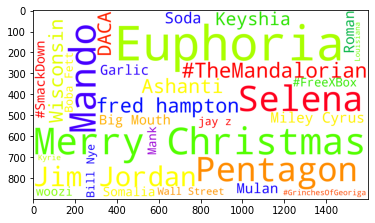

In [172]:
plt.imshow(wordcloud)

# Cleaning and pre-processing Tweets for Analysis

- Data cleaning is one of the most common tasks of a Data Scientist
- When it comes to NLP, you have some tasks that you can do for normalizing tweets
  - Converting all the tweets to be of the same case
  - Removal of #, @, duplicates
  - Removing whitespace
  - Removing punctuation, stop-words
  - Removing Retweets or Favorites
  - Stemming -> The stem does not have to be meaningful
  - Lemmatization -> The stem has to be a meaningful name
  - Tokenization

- We have a twitter preprocessor. This is the library and TextBlob utility functions
- You can automatically remove:
  - URLs
  - @ mentions
  - hashtags #
  - retweets RT
  - favorite FAV
  - emojis -> emoticon library
  - numbers

In [173]:
!pip install tweet_preprocessor

In [174]:
import preprocessor as p

In [175]:
# remove urls p.OPT.URL
# remove reserved keywords like RT for retweet p.OPT.RESERVED
# remove smileys p.OPT.SMILEY
# remove hashtag p.OPT.HASHTAG
# remove number p.OPT.NUMBER
# remove emoji p.OPT.EMOJI
# remove mentions p.OPT.MENTION
p.set_options(p.OPT.URL, p.OPT.RESERVED)

In [176]:
tweet_text = 'RT A sample retweet with the URL https://nasa.gov'

In [177]:
p.clean(tweet_text)

'A sample retweet with the URL'

# Twitter Streaming API

- Streams randomly selected live tweets up to a maximum of 1% of the tweets per day (1% of 500,000,000 tweets)
- The Streaming API will give you access to 7.5 million tweets/day
- The StreamListener uses persistent connection to push tweets to your app
- The rate of streaming varies based on the search criteria
- Using the StreamListener, you are able to get notified when new tweets arrive
- The StreamListener has a number of methods that can be overriden:
  - on_connect(self) -> executed only when you connect
  - on_status(self, status) -> called when tweets arrive
  - on_limit(self, track) -> called when limit notice arrives
  - on_error(self, status_code) -> called in response to error codes sent by Twitter
  - on_timeout(self) -> called if the connection times out i.e. Twitter is not responding
  - on_warning(self, notice) -> called when Twitter sends a disconnection warning

In [178]:
import tweepy
from textblob import TextBlob

In [179]:
"""We need a way of processing Tweets as they arrive."""

class TweetListener(tweepy.StreamListener):
  """Handles incoming Tweet streams"""
  def __init__(self, api, limit=10):
    self.tweet_count=0;
    self.TWEET_LIMIT=limit
    super().__init__(api)

  def on_connect(self):
    """"Called when your connection attempt is successful, enabling you to perform appropriate application tasks at that point."""
    print('Connection Successful\n')

  def on_status(self, status):
    # import pdb; pdb.set_trace()
    """Called when Twitter pushes a new tweet to you."""
    # get the Tweet text
    try:
      tweet_text = status.extended_tweet.full_text
    except:
      tweet_text = status.text
    print(f'Screen name: {status.user.screen_name}:')
    print(f'           language: {status.lang}')
    print(f'           Status: {tweet_text}')

    # if status.lang != 'en':
    #   print(f' Translated: {TextBlob(tweet_text).translate()}')

    print()
    self.tweet_count += 1 # Tracking the number of Tweets processed

    # it TWEET_LIMIT is reached return False to terminate the Stream
    return self.tweet_count <= self.TWEET_LIMIT

### Create a TweetListener

- Initializing the API object
- Get 10 Tweets by default

In [180]:
tweet_listener = TweetListener(api)

### Creating a Stream

- Tweepy Stream object will manage the connection to the Twitter Stream
- Pass the messages to the TweetListener

In [181]:
tweet_stream = tweepy.Stream(auth=api.auth, listener=tweet_listener)

### starting the Tweet Stream

- Use the Stream object's filter method
- track is a parameter passed to the filter method. It specifies a list of search terms
- It returns a full tweet JSON matching the terms searched - mentions, hashtags

In [182]:
tweet_stream.filter(track=['Jake Paul'])

Connection Successful

Screen name: murphysfelony:
           language: en
           Status: the forehead kiss withdrawals hitting like jake paul rn💔😔

Screen name: Giribal46322984:
           language: en
           Status: RT @KhmerPaul: @jakepaul I know Jake Paul is going to knock out KSI.

Screen name: Giribal46322984:
           language: en
           Status: RT @KhmerPaul: I bet one million dollars.

Jake Paul beats KSI. 

I have predicted the Logan Paul vs KSI fight. 

I have predicted the Nate…

Screen name: y0ungsoull:
           language: en
           Status: This should never see the light of day

Screen name: Teddy_37_:
           language: en
           Status: RT @616clique: KEEP IT !!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Tf kind of question is this



KeyboardInterrupt: ignored

### Tweet Sentiment Analysis

- Political researchers might want to understand how people feel about a specific issue/politician
- Companies may want to know what people are saying about their products and competitors products

In [1]:
!pip install tweepy==3.7.0

In [ ]:
import sys
import preprocessor as p
import tweepy

from textblob import TextBlob


class SentimentListener(tweepy.StreamListener):
  """Supposed to handle incoming Tweet Stream."""
  def __init__(self, api, sentiment_dict, topic, limit=10):
    """"Configures and initializes the sentiment listener."""
    self.sentiment_dict = sentiment_dict
    self.tweet_count = 0
    self.topic = topic
    self.TWEET_LIMIT = limit

    # remove URL, reserved Twitter words
    p.set_options(p.OPT.URL, p.OPT.RESERVED)

    super().__init__(api) # call superclass init
  
  def on_connect(self):
    """"Called when connection attempt is successful."""
    print('Connection Successful\n')

  def on_status(self, status):
    """"Called when Twitter pushes a new Tweet to you."""
    # import pdb; pdb.set_trace()
    try:
      # import pdb; pdb.set_trace()
      tweet_text = status.extended_tweet.full_text
    except:
      tweet_text = status.text
    
    # ignore retweets
    if tweet_text.startswith('RT'):
      return
    # if status.retweeted_status:
    #   return

    tweet_text = p.clean(tweet_text) # cleaning the Tweet

    # ignore Tweets if the topic is not in the Tweet text
    if self.topic.lower() not in tweet_text.lower():
      return

    # update self.sentiment_dict with the polarity
    blob = TextBlob(tweet_text)

    if blob.sentiment.polarity > 0:
      sentiment = '+'
      self.sentiment_dict['positive'] += 1
    elif blob.sentiment.polarity == 0:
      sentiment = ''
      self.sentiment_dict['neutral'] += 1
    else:
      sentiment = '-'
      self.sentiment_dict['negative'] += 1

    print(f'Screen name: {status.user.screen_name}:')
    print(f'           Status: {tweet_text}')

    # search_key = 'Jake Paul'
    print(f'Tweet sentiment for "{self.topic}"')
    print(f'Positive: ', self.sentiment_dict['positive'])
    print(f'Neutral: ', self.sentiment_dict['neutral'])
    print(f'Negative: ', self.sentiment_dict['negative'])

    self.tweet_count += 1

    # If TWEET_LIMIT is reached return False to terminate the Stream
    return self.tweet_count <= self.TWEET_LIMIT


In [ ]:
def main(search_key, limit):
  sentiment_dict = {
      'positive': 0,
      'neutral': 0,
      'negative': 0
  }
  tweet_listener = SentimentListener(api, sentiment_dict, search_key, limit)
  tweet_stream = tweepy.Stream(auth=api.auth, listener=tweet_listener)
  tweet_stream.filter(track=[search_key], languages=['en'], is_async=False)

In [ ]:
main('Jake Paul', 3)

In [ ]:
run sentiment_listener_solution.py 'uhuru' 3

## Notes

- Putting the api credentials and authentication makes it such that tweepy is unable to authenticate you
- I also think potentially that putting the sentiment dictionary in the main makes it unable to get context from the class function since nothing is returned from the class directly. That's why the counts were always 0

In [ ]:
sentiment_dict = {
    'positive': 0,
    'neutral': 0,
    'negative': 0
}
tweet_listener = SentimentListener(api, sentiment_dict, 'Jake Paul', 3)
tweet_stream = tweepy.Stream(auth=api.auth, listener=tweet_listener)
tweet_stream.filter(track=['Jake Paul'])

In [ ]:
main('uhuru', 3)

In [ ]:
!pip install nose

In [ ]:
run sentiment_listerner.py uhuru 3

In [ ]:
!pip show preprocessor

# Geocoding and mapping

- We collect Tweets and then plot their locations on an interactive map
- Twitter disables precise location information (latitude/longitude) by default
- Users must opt in to location tracking
- A large percentage of these will include the user's home location information
- The information could be invalid/fictitious
- We'll use the geopy library
- It translates location into latitude & longitude. It supports several geocoding web services some of which have free or lite tiers
- We'll use the OpenMapquest geocoding service

```shell
conda install folium -c conda-forge
```

In [ ]:
!pip install folium==0.11.0

- Folium uses the Leaflet.js Javascript mapping library that displays maps in web pages
- The output is a HTML file that the browser can be able to show

In [3]:
import tweepy
import keys

In [4]:
from tweetutilities import get_API

In [5]:
api = get_API()

In [6]:
tweets = []

In [7]:
counts = {
    'total_tweets': 0,
    'locations': 0
}

## Creating a location listener

- It uses the utility function get_tweet_content to extract the screen_name, the tweet_text and the location.
- The data is placed in a dictionary

In [7]:
from location_listener import LocationListener

In [8]:
location_listener = LocationListener(api, counts_dict=counts, tweets_list=tweets, topic='sonko', limit=10)

## Configure and start the stream of tweets

In [1]:
import tweepy

In [2]:
stream = tweepy.Stream(auth=api.auth, listener=location_listener)

NameError: ignored

In [11]:
stream.filter(track=['trump'], languages=['en'], is_async=False)

KeyboardInterrupt: ignored

In [10]:
tweets = [{'location': 'Eldoret, Kenya',
  'screen_name': 'YouthAdvocateKe',
  'text': 'What Went Wrong Sonko? \n\nHis Fall out With President Uhuru Kenyatta Landed him in Hot Soup,Soon Corruption Cases/Ch… https://t.co/wr9YoEQYzV'},
 {'location': 'Nairobi, Kenya',
  'screen_name': 'KenMOJA',
  'text': 'Govt Issues Sonko New Directives After Impeachment. @Kenyans \nhttps://t.co/rT7Jy8umfG'},
 {'location': 'Nairobi, Kenya',
  'screen_name': 'FmuliKE',
  'text': 'What Next? Mike Sonko Suffers Major Blows Following\xa0Impeachment https://t.co/VYstPhqA27'},
 {'location': 'Nairobi, Kenya',
  'screen_name': 'w_nyamasege',
  'text': 'What Next? Mike Sonko Suffers Major Blows Following\xa0Impeachment https://t.co/VG1bz5C3Ns'},
 {'location': 'Nairobi, Kenya',
  'screen_name': 'KahawaTungu',
  'text': 'What Next? Mike Sonko Suffers Major Blows Following\xa0Impeachment https://t.co/4Cybi4Rlyn'},
 {'location': 'Naivasha, Kenya',
  'screen_name': 'JoeOisebe',
  'text': '@realdavidtarus Was Sonko charged for looting maize or money https://t.co/qoZ6fAIsKN'},
 {'location': 'Nairobi Kenya',
  'screen_name': 'KenyaTodayNews',
  'text': 'Senate Speaker Lusaka receives Sonko ouster\xa0motion https://t.co/1BS6ETN8Qa'},
 {'location': 'Nairobi, Kenya',
  'screen_name': 'vidijah',
  'text': '@realdavidtarus who lied to u sonko was elected'},
 {'location': 'Africa',
  'screen_name': 'allafrica',
  'text': 'Nairobi Governor Mike Sonko Impeached @CapitalFMKenya: https://t.co/EsxiUOvpw9 #Kenya https://t.co/jq8dDqGb0z'},
 {'location': 'Kenya',
  'screen_name': 'RobertAlai',
  'text': 'What Next? Mike Sonko Suffers Major Blows Following Impeachment https://t.co/RFFcgdOHgh https://t.co/8Eoma654wM'}]

In [8]:
 counts['total_tweets']

0

In [12]:
counts['locations']

10

In [13]:
print(f'{counts["locations"]/counts["total_tweets"]: .1%}')

 76.9%


##Geocoding the locations

- Uses the get_geocodes utility function
- OpenMapQuest geocoding service times out when it cannot handle your request.
- If so, get_geocodes will notify you, waits then retries the request

In [11]:
from tweetutilities import get_geocodes

In [36]:
# from geopy import OpenMapQuest
# import time

# def get_geocodes(tweet_list):
#     """Get the latitude and longitude for each Tweet's location.
#     Returns the number of Tweets with invalid location data.
#     """
#     print('Getting co-ordinates for Tweet locations....')

#     geo = OpenMapQuest(api_key=keys.mapquest_key) # geocoder
#     bad_locations = 0 

#     for tweet in tweet_list:
#         processed = False
#         delay = .1  # used if OpenMapQuest times out to delay the next call
#         while not processed:
#             try:  # getting the coordinates for the tweet['location']
#                 geo_location = geo.geocode(tweet['location'])
#                 processed = True
#             except:  # timed out so we wait before trying again
#                 print('OpenMapQuest service timed out waiting....')
#                 time.sleep(delay)
#                 delay += .1
#         if geo_location:
#             tweet['latitude'] = geo_location.latitude
#             tweet['longitude'] = geo_location.longitude
#         else:
#             bad_locations += 1  # tweet['location'] was invalid

#     print('Done geocoding')
#     return bad_locations

In [13]:
bad_locations = get_geocodes(tweets)

Getting co-ordinates for Tweet locations....
Done geocoding


In [16]:
bad_locations

0

In [19]:
if bad_locations == 0:
  print('Zero division')
else:
  print(f"{bad_locations / counts['locations']:.1%}")

Zero division


## Cleaning the data

- Use Pandas DataFrame to clean the data
- DataFrame will contain NaN for the latitude and longitude for any tweet that does not have valid location
- Remove such values via the DataFrame DropNa method

In [20]:
import pandas as pd

In [21]:
df = pd.DataFrame(tweets)

In [22]:
df

,location,screen_name,text,latitude,longitude
0,"Eldoret, Kenya",YouthAdvocateKe,What Went Wrong Sonko? \n\nHis Fall out With P...,0.519833,35.271548
1,"Nairobi, Kenya",KenMOJA,Govt Issues Sonko New Directives After Impeach...,-1.283253,36.817245
2,"Nairobi, Kenya",FmuliKE,What Next? Mike Sonko Suffers Major Blows Foll...,-1.283253,36.817245
3,"Nairobi, Kenya",w_nyamasege,What Next? Mike Sonko Suffers Major Blows Foll...,-1.283253,36.817245
4,"Nairobi, Kenya",KahawaTungu,What Next? Mike Sonko Suffers Major Blows Foll...,-1.283253,36.817245
5,"Naivasha, Kenya",JoeOisebe,@realdavidtarus Was Sonko charged for looting ...,-0.716600,36.433300
6,Nairobi Kenya,KenyaTodayNews,Senate Speaker Lusaka receives Sonko ouster mo...,-1.283253,36.817245
7,"Nairobi, Kenya",vidijah,@realdavidtarus who lied to u sonko was elected,-1.283253,36.817245
8,Africa,allafrica,Nairobi Governor Mike Sonko Impeached @Capital...,2.000000,16.000000
9,Kenya,RobertAlai,What Next? Mike Sonko Suffers Major Blows Foll...,1.441968,38.431398


In [23]:
df = df.dropna()

In [25]:
df

,location,screen_name,text,latitude,longitude
0,"Eldoret, Kenya",YouthAdvocateKe,What Went Wrong Sonko? \n\nHis Fall out With P...,0.519833,35.271548
1,"Nairobi, Kenya",KenMOJA,Govt Issues Sonko New Directives After Impeach...,-1.283253,36.817245
2,"Nairobi, Kenya",FmuliKE,What Next? Mike Sonko Suffers Major Blows Foll...,-1.283253,36.817245
3,"Nairobi, Kenya",w_nyamasege,What Next? Mike Sonko Suffers Major Blows Foll...,-1.283253,36.817245
4,"Nairobi, Kenya",KahawaTungu,What Next? Mike Sonko Suffers Major Blows Foll...,-1.283253,36.817245
5,"Naivasha, Kenya",JoeOisebe,@realdavidtarus Was Sonko charged for looting ...,-0.716600,36.433300
6,Nairobi Kenya,KenyaTodayNews,Senate Speaker Lusaka receives Sonko ouster mo...,-1.283253,36.817245
7,"Nairobi, Kenya",vidijah,@realdavidtarus who lied to u sonko was elected,-1.283253,36.817245
8,Africa,allafrica,Nairobi Governor Mike Sonko Impeached @Capital...,2.000000,16.000000
9,Kenya,RobertAlai,What Next? Mike Sonko Suffers Major Blows Foll...,1.441968,38.431398


## Creating a Map with Folium

In [27]:
import folium

In [28]:
usmap = folium.Map(location=[39.8283, -98.5795], tiles='Stamen Terrain', zoom_start=4, detect_retina=True)

In [29]:
for t in df.itertuples():
  text = ': '.join([t.screen_name, t.text])
  popup = folium.Popup(text, parse_html=True)
  marker = folium.Marker((t.latitude, t.longitude), popup=popup)
  marker.add_to(usmap)

In [30]:
usmap.save('tweet_map.html')

In [31]:
usmap

## Ways to store the Tweets

- CSV
- Pandas DataFrame in memory
- SQL Database
- NoSQL Database - Twitter returns data as JSON documents. We can store it as a NoSQL JSON document - MongoDB, Cassandra


- Time series that is based on data from Twitter

In [15]:
tweets

[{'latitude': 0.5198329,
  'location': 'Eldoret, Kenya',
  'longitude': 35.2715481,
  'screen_name': 'YouthAdvocateKe',
  'text': 'What Went Wrong Sonko? \n\nHis Fall out With President Uhuru Kenyatta Landed him in Hot Soup,Soon Corruption Cases/Ch… https://t.co/wr9YoEQYzV'},
 {'latitude': -1.2832533,
  'location': 'Nairobi, Kenya',
  'longitude': 36.8172449,
  'screen_name': 'KenMOJA',
  'text': 'Govt Issues Sonko New Directives After Impeachment. @Kenyans \nhttps://t.co/rT7Jy8umfG'},
 {'latitude': -1.2832533,
  'location': 'Nairobi, Kenya',
  'longitude': 36.8172449,
  'screen_name': 'FmuliKE',
  'text': 'What Next? Mike Sonko Suffers Major Blows Following\xa0Impeachment https://t.co/VYstPhqA27'},
 {'latitude': -1.2832533,
  'location': 'Nairobi, Kenya',
  'longitude': 36.8172449,
  'screen_name': 'w_nyamasege',
  'text': 'What Next? Mike Sonko Suffers Major Blows Following\xa0Impeachment https://t.co/VG1bz5C3Ns'},
 {'latitude': -1.2832533,
  'location': 'Nairobi, Kenya',
  'longitud

In [ ]:
data = [{'location': 'Eldoret, Kenya',
  'screen_name': 'YouthAdvocateKe',
  'text': 'What Went Wrong Sonko? \n\nHis Fall out With President Uhuru Kenyatta Landed him in Hot Soup,Soon Corruption Cases/Ch… https://t.co/wr9YoEQYzV'},
 {'location': 'Nairobi, Kenya',
  'screen_name': 'KenMOJA',
  'text': 'Govt Issues Sonko New Directives After Impeachment. @Kenyans \nhttps://t.co/rT7Jy8umfG'},
 {'location': 'Nairobi, Kenya',
  'screen_name': 'FmuliKE',
  'text': 'What Next? Mike Sonko Suffers Major Blows Following\xa0Impeachment https://t.co/VYstPhqA27'},
 {'location': 'Nairobi, Kenya',
  'screen_name': 'w_nyamasege',
  'text': 'What Next? Mike Sonko Suffers Major Blows Following\xa0Impeachment https://t.co/VG1bz5C3Ns'},
 {'location': 'Nairobi, Kenya',
  'screen_name': 'KahawaTungu',
  'text': 'What Next? Mike Sonko Suffers Major Blows Following\xa0Impeachment https://t.co/4Cybi4Rlyn'},
 {'location': 'Naivasha, Kenya',
  'screen_name': 'JoeOisebe',
  'text': '@realdavidtarus Was Sonko charged for looting maize or money https://t.co/qoZ6fAIsKN'},
 {'location': 'Nairobi Kenya',
  'screen_name': 'KenyaTodayNews',
  'text': 'Senate Speaker Lusaka receives Sonko ouster\xa0motion https://t.co/1BS6ETN8Qa'},
 {'location': 'Nairobi, Kenya',
  'screen_name': 'vidijah',
  'text': '@realdavidtarus who lied to u sonko was elected'},
 {'location': 'Africa',
  'screen_name': 'allafrica',
  'text': 'Nairobi Governor Mike Sonko Impeached @CapitalFMKenya: https://t.co/EsxiUOvpw9 #Kenya https://t.co/jq8dDqGb0z'},
 {'location': 'Kenya',
  'screen_name': 'RobertAlai',
  'text': 'What Next? Mike Sonko Suffers Major Blows Following Impeachment https://t.co/RFFcgdOHgh https://t.co/8Eoma654wM'}]